In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from random import randint

# Types of States of Markov chains 

In this notebook we want to explore the ways states of Markov chains can be classified. So we will look into absorbant states, open and closed classes, and periodicity. We need a few functions from the previous notebook. To make sure that we always have a stochastic matrix we define a function that test this for us.

In [2]:
#here we check whether the matrix is a probability matrix
def check_trans(P):
    if np.shape(P)[1] != np.shape(P)[0]:
        print("This is not a proper transition matrix, it is not square.")
        return
    elif True in (P < 0):
        print("This is not a proper transition matrix, at least one entry is negative.")
        return
    elif False in ( np.sum(P, axis = 1) == 1):
        print("This is not a proper transition matrix, at least one row does not sum to 1.")
        return

We need a function to plot one sample path for a given transition matrix. This is the function *plot_path*, that prints the plot of the path and takes as inputs $P$, a transition matrix, $start$, the starting state, and $nsteps$, the number of step we want it to make.

In [3]:
def plot_path(P, start, nsteps):
    
    #f irst we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    plt.figure(figsize=(17, 4))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('State')
    plt.xlabel('Time')
    plt.axis([-1, nsteps+1, -0.2, np.shape(P)[1]-0.8])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));    
    
    # we will use this to save the states
    X = np.zeros(nsteps+1)
    # starting state
    X[0] = start
    for i in range(0, nsteps) :
        step = uniform.rvs(size = 1, loc = 0, scale = 1)
        next = 0
        while sum(P[int(X[i])][range(0,next+1)]) < step:
                  next = next + 1
        X[i+1] = next
        
    # Choose style of the lines
    ax.plot(X, linestyle= 'dotted', marker='s')
    return

We also need one to plot multiple paths next to each other. Here we define a function _plot_mult_paths_ to do this. It takes the variables $P$, the transition matrix, $start$, the starting state, $nsteps$ the number of steps each sample path takes and $reps$, the number of sample paths that get plotted. Don't set the number of sample paths to too high or the plot will be cluttered.

In [4]:
# P is the transition matrix
# start is the starting state
# nsteps is the number of steps each sample takes
# reps is the number of paths that will be plotted

def plot_mult_paths(P, start, nsteps, reps):
    
    # first we check whether we have a valid transition matrix
    check_trans(P)
    
    # then we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # create the figure we will add the plots to
    fig, axis = plt.subplots(reps, 1)
    
    # adjust the size of the figure
    fig.set_figheight(min(reps+2,10))
    fig.set_figwidth(17)
    
    #subplot spacing
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    
    for r in range(0,reps):
        # we will use this to save the states
        X = np.zeros(nsteps + 1)
        # starting state
        X[0] = start
        # now we sample the rth repetition of our path
        for i in range(0, nsteps) :
            step = uniform.rvs(size = 1, loc = 0, scale = 1)
            next = 0
            while sum(P[int(X[i])][range(0,next+1)]) < step:
                      next = next + 1
            X[i+1] = next
        
        # Remove the plot frame lines.
        ax = axis[r] 
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        
        # Choose style of the lines
        ax.plot(X, linestyle= 'dotted', marker='s', color = ('#%06X' % randint(0, 0xFFFFFF)))
        
        if r == reps-1:
            ax.set_xlabel('Time')
         
        if r == np.floor(reps/2):
            ax.set_ylabel('State')
        
        
    return

Sometimes it is even more useful to plot several sample paths on top of each other. The following function _plot_many_paths_ does this: each path will be drawn in the same color, but with some transparency. So the lines and dots will be more pronounced in areas where the chain typically spends more time. 

The function _plot_many_paths_ takes the same input variables as the function _plot_mult_paths_. You typically want a higher number of repetition for this function, something like 30 for instance.

In [5]:
# P is the transition matrix
# start is the starting state
# nsteps is the number of steps each sample takes
# reps is the number of paths that will be plotted

def plot_many_paths(P, start, nsteps, reps):
    
    # first we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # create the figure we will add the plots to
    plt.figure(figsize=(17, 4))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('State')
    plt.xlabel('Time')
    plt.axis([-0.5, nsteps+1, -0.2, np.shape(P)[1]-0.8])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));  

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    
    for r in range(0,reps):
        # we will use this to save the states
        X = np.zeros(nsteps+1)
        # starting state
        X[0] = start
        for i in range(0, nsteps) :
            step = uniform.rvs(size = 1, loc = 0, scale = 1)
            next = 0
            while sum(P[int(X[i])][range(0,next+1)]) < step:
                      next = next + 1
            X[i+1] = next
        # Choose style of the lines
        ax.plot(X, linestyle= 'dotted', marker='s', alpha = 2/reps, color = "blue")
    return

### Absorbant states

We will now use a Markov chain with three states. Have a look at the transition matrix $T$ below and try to predict it's behaviour.

In [6]:
# probability of moving from 0 to 0
p_00 = 0.8
# probability of moving from 0 to 1
p_01 = 0.1
# probability of moving from 1 to 0
p_10 = 0.5
# probability of moving from 1 to 1
p_11 = 0.4
# probability of moving from 2 to 0
p_20 = 0
# probability of moving from 2 to 1
p_21 = 0

T = np.array( [ [ p_00, p_01, 1 - p_00 - p_01 ], [ p_10, p_11, 1 - p_10 - p_11 ], [ p_20, p_21, 1 - p_20 - p_21 ] ] )

# we round the matrix to avoid floating point errors
T = np.round(T,10)

print("T = \n", T)

check_trans(T)

T = 
 [[0.8 0.1 0.1]
 [0.5 0.4 0.1]
 [0.  0.  1. ]]


Now run the cell below a few times with different starting states to see several sample paths.

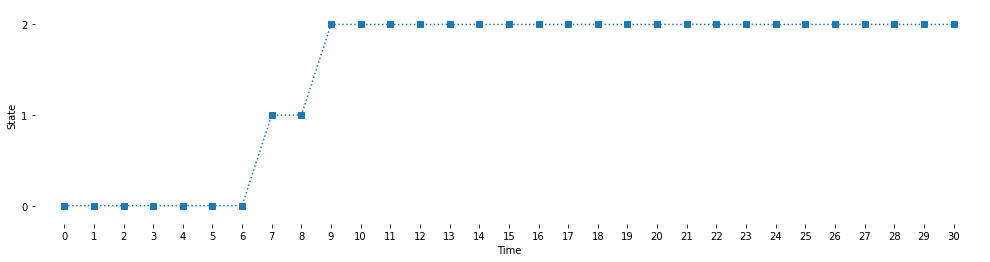

In [7]:
# initial state
start = 0
# number of steps for each path
steps = 30

plot_path(T, start, steps)

Does the path look like you predicted? What do you notice? Is there a state that is special in some sense?

Maybe we can recognize the pattern more easily if we plot several paths in the same figure. Have a look:

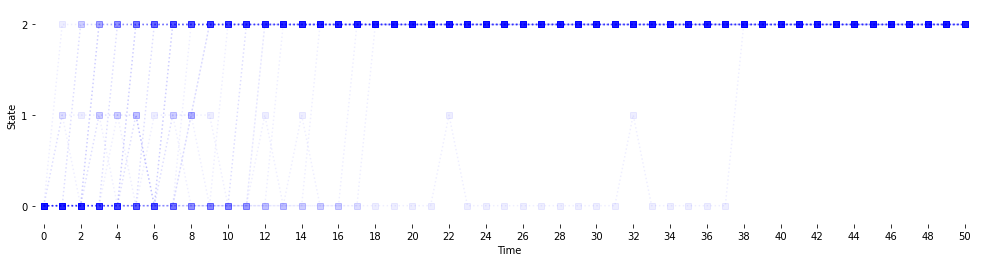

In [8]:
# initial state
start = 0
# number of steps for each path
steps = 50
# number of sample paths
reps = 30

plot_many_paths(T, start, steps, reps)

### Closed and irreducible classes

Let's look at one more example of a three-state Markov chain that has states with different properties, let us call it $U$. As before, first try to guess the behaviour and then try to compare your guess to the patterns you see on the plot.

In [9]:
# probability of moving from 0 to 0
p_00 = 0.7
# probability of moving from 0 to 1
p_01 = 0.3
# probability of moving from 1 to 0
p_10 = 0.6
# probability of moving from 1 to 1
p_11 = 0.4
# probability of moving from 2 to 0
p_20 = 0.1
# probability of moving from 2 to 1
p_21 = 0.1

# now we define the matrix using the values above
U = np.array( [ [ p_00 , p_01, 1 - p_00 - p_01 ], [ p_10, p_11, 1 - p_10 - p_11 ], [ p_20, p_21, 1 - p_20 - p_21 ] ] )

# we round the matrix to avoid floating point errors
U = np.round(U, 10)

print("U = \n", U)

check_trans(U)

U = 
 [[0.7 0.3 0. ]
 [0.6 0.4 0. ]
 [0.1 0.1 0.8]]


We again want to study the properties of the different states. Run the program a few times with different starting states, and see how the properties of the path change.

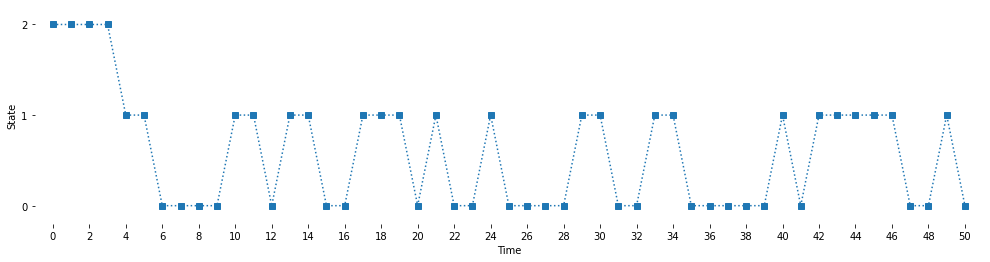

In [10]:
# initial state
start = 2
# number of steps for each path
steps = 50

plot_path(U, start, steps)

What do you notice about the states of this matrix? Are any of them special in any way?

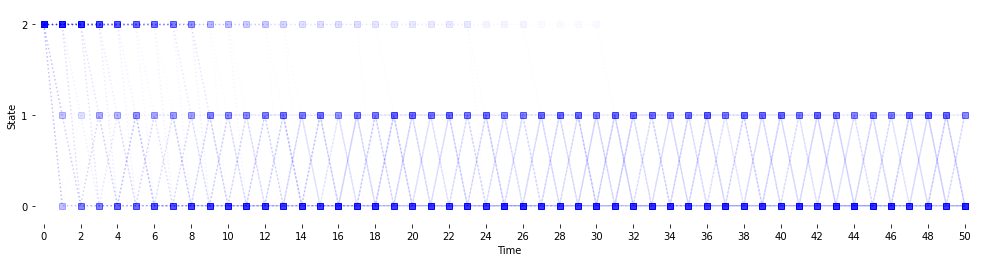

In [11]:
# initial state
start = 2
# number of steps for each path
steps = 50
# number of sample paths
reps = 30

plot_many_paths(U, start, steps, 100)

### Explore

Now try to define a three-state transition matrix with states that have specific properties similar to above. To this change the values $p_{ij}$ in the cell below. Remember that we need $p_{ij} \geq 0$ for all $i$ and $j$ and $p_{i0} + p_{i1} + p_{i2} = 1$ for all $i$, so you cannot set $p_{i0}$ and $p_{i1}$ to values that sum to more than 1.

In [12]:
# probability of moving from 0 to 0
p_00 = 0.3
# probability of moving from 0 to 1
p_01 = 0.4
# probability of moving from 1 to 0
p_10 = 0.3
# probability of moving from 1 to 1
p_11 = 0.4
# probability of moving from 2 to 0
p_20 = 0.4
# probability of moving from 2 to 1
p_21 = 0.3

By running the cell below a matrix is defined using the values that you chose above. You will get an error message if you input values that are not compatible with a transition matrix.

In [13]:
# now we define the matrix using the values above
V = np.array( [ [ p_00 , p_01, 1 - p_00 - p_01 ], [ p_10, p_11, 1 - p_10 - p_11 ], [ p_20, p_21, 1 - p_20 - p_21 ] ] )

# we round the matrix to avoid floating point errors
V = np.round(V, 10)

print("V = \n", V)

check_trans(V)

V = 
 [[0.3 0.4 0.3]
 [0.3 0.4 0.3]
 [0.4 0.3 0.3]]


Let's now plot a single path using this transition matrix and right below several paths in the same plot.

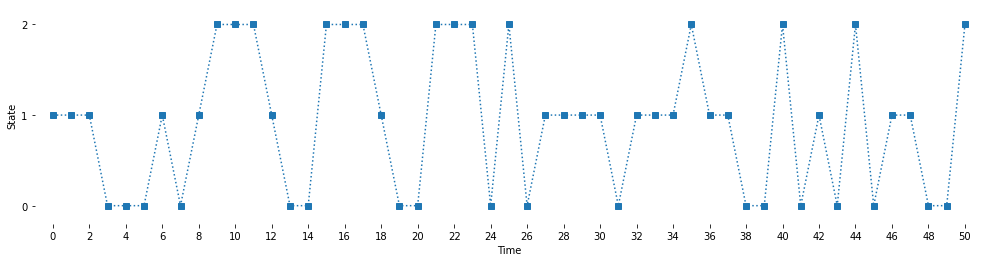

In [14]:
# initial state
start = 1
# number of steps for each path
steps = 50

plot_path(V, start, steps)

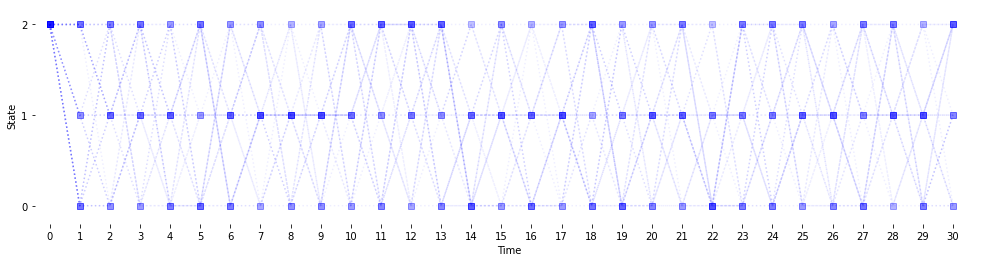

In [15]:
# initial state
start = 2
# number of steps for each path
steps = 30
# number of sample paths
reps = 30

plot_many_paths(V, start, steps, reps)

If the plots don't look the way you expected, try to adjust the values to get what you had in mind.

## Periodicity

There is one last concept we want to explore in this notebook: periodicity. For this we extend our state space one more time, to now have 4 states. This last transition matrix will be called $W$.

In [16]:
# probability of moving from 0 to 0
p_00 = 0
# probability of moving from 0 to 1
p_01 = 0.5
# probability of moving from 0 to 2
p_02 = 0
# probability of moving from 1 to 0
p_10 = 0.2
# probability of moving from 1 to 1
p_11 = 0
# probability of moving from 1 to 2
p_12 = 0.8
# probability of moving from 2 to 0
p_20 = 0
# probability of moving from 2 to 1
p_21 = 0.1
# probability of moving from 2 to 2
p_22 = 0
# probability of moving from 2 to 0
p_30 = 0.6
# probability of moving from 2 to 1
p_31 = 0
# probability of moving from 2 to 2
p_32 = 0.4

# now we define the matrix using the values above
W = np.array( [ [ p_00 , p_01, p_02, 1 - p_00 - p_01 - p_02 ], 
               [ p_10, p_11, p_12, 1 - p_10 - p_11 - p_12 ], 
               [ p_20, p_21, p_22, 1 - p_20 - p_21 - p_22 ],
               [ p_30, p_31, p_32, 1 - p_30 - p_31 - p_32 ]] )

# we round the matrix to avoid floating point errors
W = np.round(W,10)

print("W = \n", W)

check_trans(W)

W = 
 [[0.  0.5 0.  0.5]
 [0.2 0.  0.8 0. ]
 [0.  0.1 0.  0.9]
 [0.6 0.  0.4 0. ]]


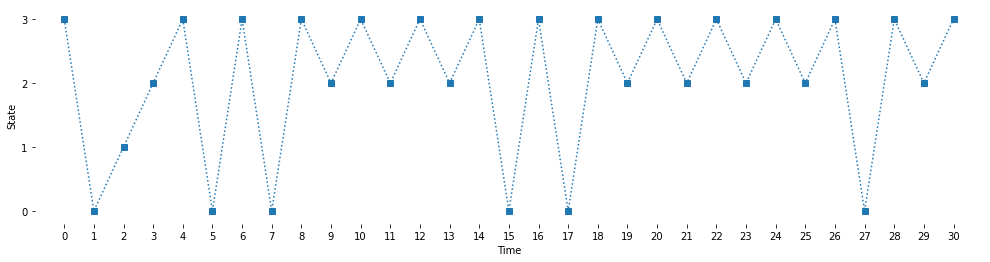

In [17]:
# initial state
start = 3
# number of steps for each path
steps = 30

plot_path(W, start, steps)

Can you recognize anything from these graphs? I think that it is much harder in this case, but the overlaying paths will be much more useful:

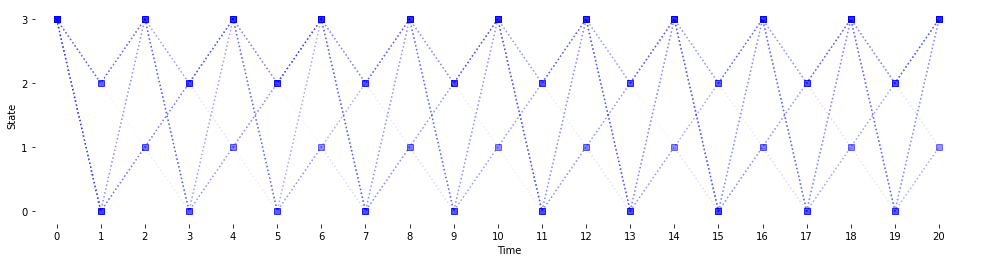

In [18]:
# initial state
start = 3
# number of steps for each path
steps = 20
# number of sample paths
reps = 20

plot_many_paths(W,start,steps,100)

Does an interesting pattern emerge here? If yes, what is it? Can you describe it? Have another look at the matrix we defined. How can you recognize from the matrix that the paths will have this property?